# Euclidean Benchmark 

In [1]:
import Euclidean_Benchmark as eb

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from itertools import permutations as perm
%matplotlib inline

### Downloading Price Data

In [3]:
ticker_list = ["AAL", "AAP", "AAPL", "GLD", "GOOG", "TSLA", "GDX", "GOOGL"]

In [4]:
data = np.log(yf.download(ticker_list, period="10y", interval="1d")["Adj Close"])
data

[*********************100%***********************]  8 of 8 completed


,AAL,AAP,AAPL,GDX,GLD,GOOG,GOOGL,TSLA
Date,,,,,,,,
2013-03-28,2.772484,4.343872,2.614046,3.546601,5.039870,2.984702,2.989444,0.926637
2013-04-01,2.754647,4.340114,2.582491,3.535976,5.041294,2.993477,2.998219,1.074547
2013-04-02,2.697242,4.346048,2.584541,3.493150,5.026705,3.008160,3.012901,1.083837
2013-04-03,2.683810,4.337439,2.589646,3.446656,5.015490,2.999711,3.004453,1.007958
2013-04-04,2.694060,4.338412,2.579713,3.474584,5.012567,2.985809,2.990551,1.029858
...,...,...,...,...,...,...,...,...
2023-03-21,2.665143,4.785740,5.070664,3.401197,5.195010,4.661928,4.653198,5.286144
2023-03-22,2.626117,4.732683,5.061519,3.419692,5.211888,4.646504,4.638315,5.253058
2023-03-23,2.612273,4.710791,5.068464,3.443938,5.224348,4.665889,4.659658,5.258641


### Normalise Data and Divide into Training and Test Sets

In [5]:
data = eb.normalise_prices(data)

train_data = data.iloc[0:2218,]
test_data = data.iloc[2218:2519,]

### Calculating Distance

In [6]:
distance_df = pd.DataFrame(data=eb.calculate_distances(train_data).values(), index=eb.calculate_distances(train_data).keys(), columns=["Euclidean Distance"])
distance_df

,Euclidean Distance
GOOG-GOOGL,0.378400
AAPL-GOOG,3.217609
AAPL-GOOGL,3.251672
AAPL-TSLA,4.903649
GOOGL-TSLA,5.423460
GOOG-TSLA,5.510297
GLD-TSLA,7.131200
GDX-GLD,7.158704
AAPL-GLD,8.082965
GDX-TSLA,8.611966


Listing Pairs with Smallest Distance:

In [7]:
distance_df["Euclidean Distance"].index[0:3].to_list()

['GOOG-GOOGL', 'AAPL-GOOG', 'AAPL-GOOGL']

In [8]:
eb.ticker_n_smallest_distance(train_data)

{1: ('GOOG', 'GOOGL'), 2: ('AAPL', 'GOOG'), 3: ('AAPL', 'GOOGL')}

### Calculate Spread

In [9]:
selected_pair_data = pd.DataFrame(index=train_data.index)
for value in eb.ticker_n_smallest_distance(train_data).values():
    selected_pair_data[f'{value[0]}-{value[1]}'] = eb.calculate_spread(train_data[list(value)])
selected_pair_data

,GOOG-GOOGL,AAPL-GOOG,AAPL-GOOGL
Date,,,
2013-03-28,-0.000090,0.028727,0.028637
2013-04-01,-0.000112,0.012829,0.012717
2013-04-02,-0.000148,0.006482,0.006334
2013-04-03,-0.000127,0.012455,0.012328
2013-04-04,-0.000093,0.015513,0.015420
...,...,...,...
2022-01-10,-0.002944,0.020133,0.017189
2022-01-11,-0.001656,0.021266,0.019610
2022-01-12,-0.001916,0.016612,0.014696


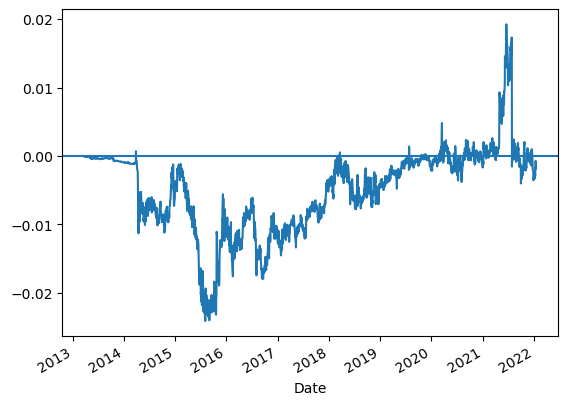

In [10]:
selected_pair_data["GOOG-GOOGL"].plot()
plt.axhline(y=0)

In [11]:
spread_data = pd.DataFrame(index=train_data.index)
for value in perm(train_data.columns, 2):
    if (f'{value[0]}-{value[1]}' not in spread_data.columns) and (f'{value[1]}-{value[0]}' not in spread_data.columns):
        spread_data[f'{value[0]}-{value[1]}'] = eb.calculate_spread(train_data[list(value)])
spread_data

,AAL-AAP,AAL-AAPL,AAL-GDX,AAL-GLD,AAL-GOOG,AAL-GOOGL,AAL-TSLA,AAP-AAPL,AAP-GDX,AAP-GLD,...,GDX-GLD,GDX-GOOG,GDX-GOOGL,GDX-TSLA,GLD-GOOG,GLD-GOOGL,GLD-TSLA,GOOG-GOOGL,GOOG-TSLA,GOOGL-TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-28,0.241352,0.263760,-0.527764,-0.343891,0.292487,0.292397,0.310029,0.022408,-0.769117,-0.585243,...,0.183874,0.820252,0.820162,0.837794,0.636378,0.636288,0.653920,-0.000090,0.017542,0.017632
2013-04-01,0.234823,0.265725,-0.529255,-0.355744,0.278554,0.278443,0.271280,0.030902,-0.764078,-0.590567,...,0.173510,0.807809,0.807697,0.800534,0.634298,0.634187,0.627024,-0.000112,-0.007274,-0.007163
2013-04-02,0.198658,0.233790,-0.527390,-0.364722,0.240273,0.240125,0.238276,0.035132,-0.726048,-0.563381,...,0.162668,0.767663,0.767515,0.765666,0.604995,0.604847,0.602999,-0.000148,-0.001996,-0.001848
2013-04-03,0.198597,0.224609,-0.498814,-0.354951,0.237065,0.236938,0.245890,0.026012,-0.697411,-0.553548,...,0.143863,0.735878,0.735751,0.744704,0.592015,0.591888,0.600841,-0.000127,0.008825,0.008953
2013-04-04,0.203346,0.233845,-0.514794,-0.344935,0.249358,0.249265,0.247154,0.030499,-0.718140,-0.548281,...,0.169859,0.764152,0.764059,0.761948,0.594293,0.594200,0.592089,-0.000093,-0.002203,-0.002111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,-0.576047,-0.582132,-0.328279,-0.386857,-0.561999,-0.564943,-0.573053,-0.006086,0.247768,0.189189,...,-0.058578,-0.233720,-0.236664,-0.244774,-0.175142,-0.178086,-0.186196,-0.002944,-0.011054,-0.008110
2022-01-11,-0.561795,-0.581671,-0.337441,-0.398499,-0.560405,-0.562061,-0.567608,-0.019876,0.224354,0.163296,...,-0.061059,-0.222964,-0.224620,-0.230167,-0.161906,-0.163562,-0.169109,-0.001656,-0.007203,-0.005547
2022-01-12,-0.596610,-0.597675,-0.366491,-0.417571,-0.581062,-0.582978,-0.590236,-0.001064,0.230119,0.179039,...,-0.051080,-0.214571,-0.216487,-0.223744,-0.163491,-0.165407,-0.172665,-0.001916,-0.009173,-0.007257


### Calculate the Number of Zero Crossings

In [12]:
spread_zero = pd.DataFrame(data=eb.calculate_zero_crossings(spread_data).values(),
                           index=eb.calculate_zero_crossings(spread_data).keys(), columns=["No. of Zero Crossings"])
spread_zero

,No. of Zero Crossings
AAL-AAPL,5
AAL-TSLA,5
AAL-GOOG,7
AAL-GOOGL,7
AAL-GLD,22
AAL-GDX,24
AAP-AAPL,30
AAP-TSLA,32
AAP-GOOG,38
AAPL-TSLA,40


Listing Pairs with highest no. of zero crossings:

In [13]:
N = 3
list(reversed(spread_zero.index[-N:]))

['GOOG-GOOGL', 'AAPL-GDX', 'GLD-TSLA']

### Calculating Spread Variance

In [14]:
spread_var = np.var(spread_data).sort_values().to_frame(name="Spread Variance")
spread_var

,Spread Variance
GOOG-GOOGL,0.000040
AAPL-GOOG,0.004657
AAPL-GOOGL,0.004764
GDX-GLD,0.007619
AAPL-TSLA,0.010585
GOOGL-TSLA,0.013058
GOOG-TSLA,0.013319
GLD-TSLA,0.019361
AAPL-GLD,0.027546
GDX-TSLA,0.029249


Listing Pairs with highest Spread Variance:

In [15]:
N = 3
list(reversed(spread_var.index[-N:]))

['AAL-GLD', 'AAL-AAPL', 'AAL-GDX']

### Calculating Metrics

In [16]:
eb.calculate_metrics(eb.calculate_distances(train_data), train_data)

,Euclidean distance,ADF p-value,Spread SD,Half-life of mean reversion,% days within 2-SD band
GOOG-GOOGL,0.3784,0.180571,0.006316,59.516,88.232642
AAPL-GOOG,3.217609,0.148265,0.06826,136.757828,92.110009
AAPL-GOOGL,3.251672,0.15293,0.069038,138.803321,93.011722
AAPL-TSLA,4.903649,0.376995,0.102906,240.913547,96.212804
GOOGL-TSLA,5.42346,0.438624,0.114296,246.906086,98.827773


### Plotting Pairs

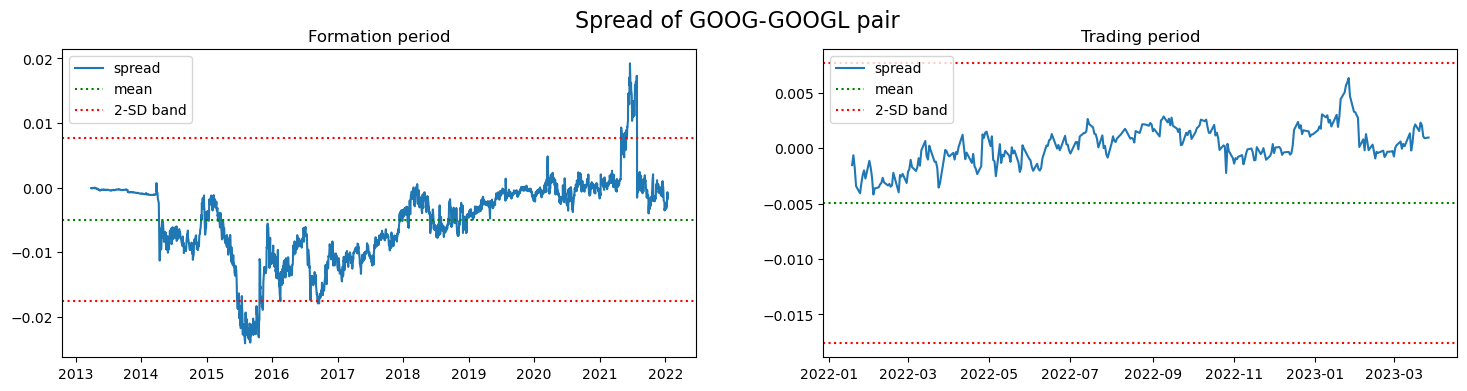

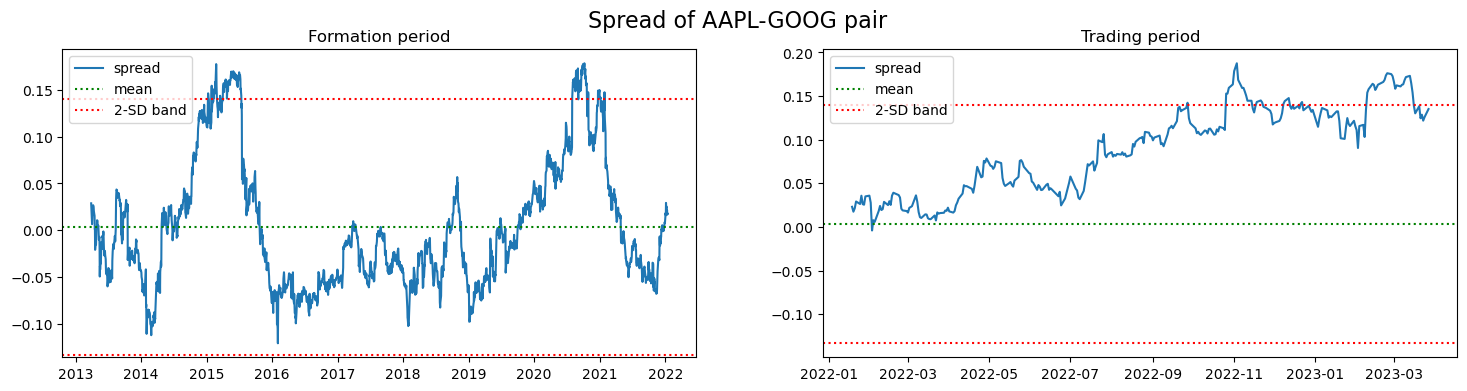

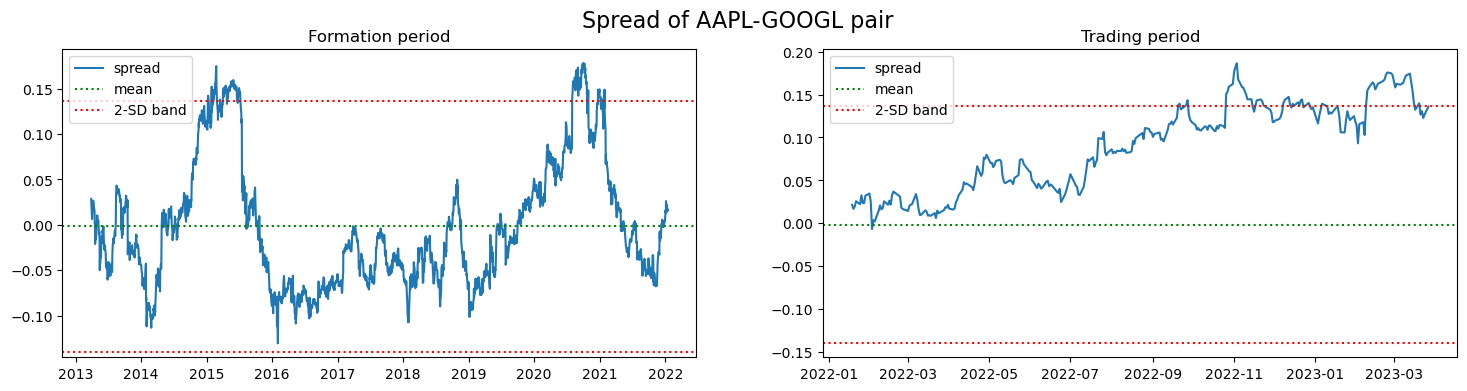

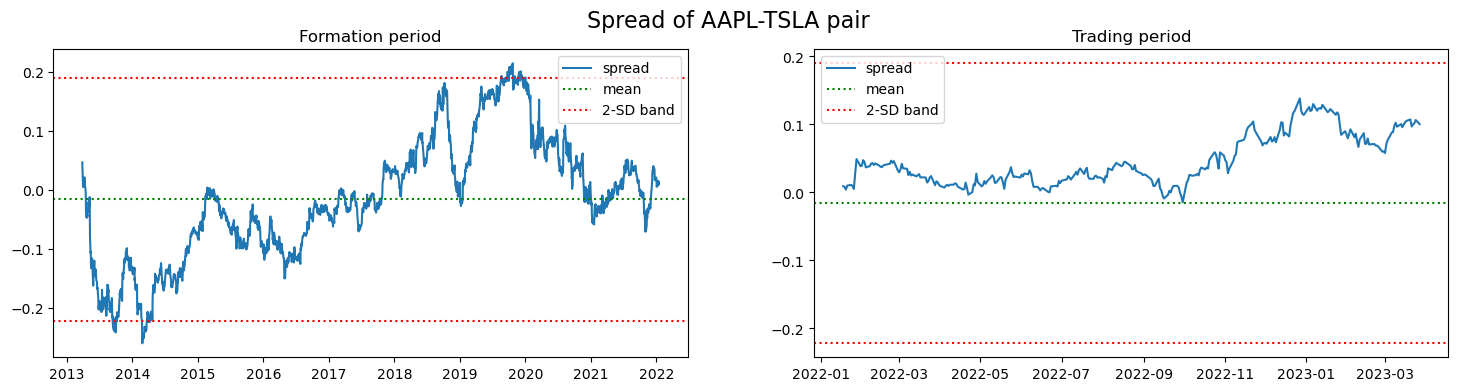

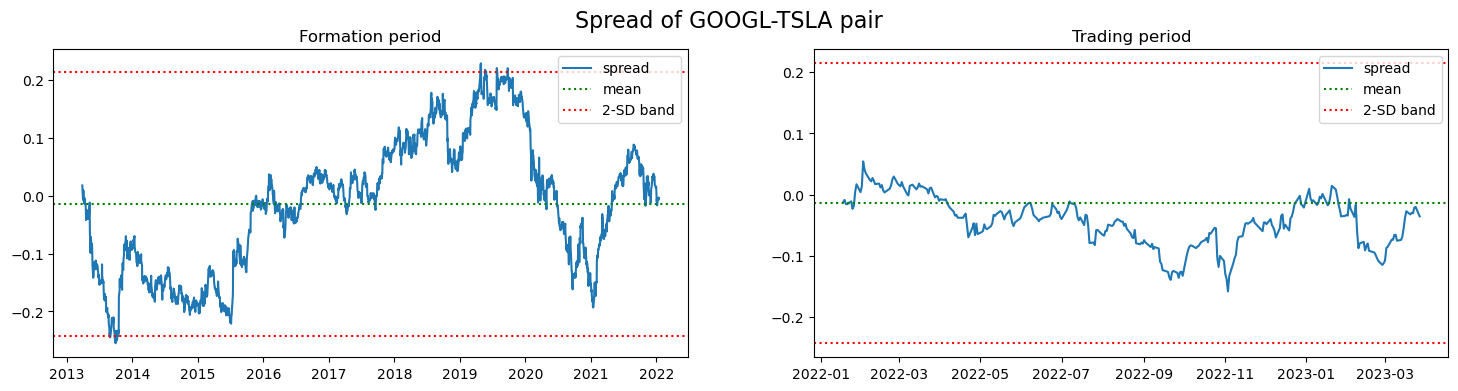

In [17]:
eb.plot_pairs(train_data, test_data)